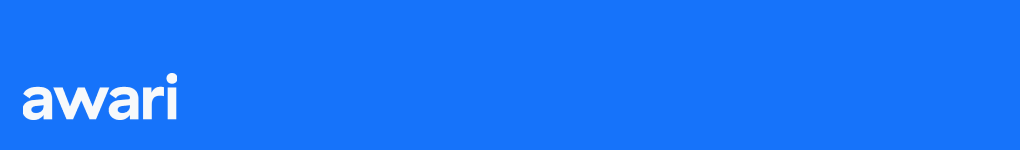

Prática da **Aula 12: Machine Learning II**, do curso de **Data Science** da **[Awari](https://awari.com.br/)**. Para utilizá-la, vá no menu "Arquivo" e, em seguida, na opção "Salvar uma cópia no Drive". Isto criará uma cópia deste notebook em uma pasta chamada "Colab Notebooks", no seu Google Drive pessoal. Use a cópia para criar novas células de código ou executar as células desta prática.

---

# **Classificação com Decision Tree**

## **Objetivo**

Nesta prática, vamos ver um problema de **Classificação** em Machine Learning. Se a Regressão é usada para a previsão de variáveis numéricas, a classificação é útil para variáveis categóricas.

Aqui, a tarefa será determinar se após um telefonema de um banco de Portugual, o cliente fará um depósito na conta baseado em seu histórico pessoal, no histórico no banco e em tentativas de contato anteriores.

## **Prática**

### **Preparativos**

Os dados que iremos analisar são do conjunto de dados [Bank marketing campaigns dataset | Opening Deposit](https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset?select=bank-additional-full.csv), disponível no Kaggle.

Você pode baixar o arquivo .CSV diretamente do Kaggle ou obtê-lo aqui: [bank-aditional-full.csv](https://drive.google.com/file/d/1NzKU8BGpjXU6wkfdoslI9JAhVSAV_hIP/view?usp=share_link).

Lembre-se que é necessário importar os dados para seu Google Drive para poder usá-los nesta análise.

Vamos acompanhar o passo a passo a seguir.

In [ ]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Montando o drive
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
# Lendo o arquivo CSV
dados = pd.read_csv('/content/drive/MyDrive/bank-additional-full.csv', sep=';')

O parâmetro `sep=';'`, usado acima, indica que queremos usar ponto e vírgula para separar os dados em colunas.

### **Análise exploratória dos dados**

Tendo importado os dados, vamos analisá-los para entendê-los melhor:

In [ ]:
dados.head()

As variáveis ou *features* do dataset são:

* **age:** idade (variável numérica);
* **job:** emprego (variável categórica);
* **marital:** estado civíl (variável categórica);
* **education:** nível de educação (variável categórica);
* **default:** já tem crédito? (variável categórica);
* **housing:** tem hipoteca? (variável categórica);
* **loan::** empréstimo pessoal? (variável categórica);
* **contact:** tipo de contato (variável categórica);
* **month:** mês do último contato (variável categórica);
* **day_of_week:** dia da semana da tentativa de contato (variável categórica);
* **duration:** duração da última chamada (variável numérica);
* **campaign:** número de ligações para o cliente (variável numérica);
* **pdays:** intervalo entre as duas últimas ligações (variável numérica);
* **previous:** número de ligações antes desta campanha (variável numérica);
* **poutcome:** resultado da última campanha (variável categórica);
* **emp.var.rate:** taxa da variaçào de emprego (variável numérica);
* **cons.price.idx:** indice de preço do consumidor (variável numérica);
* **cons.conf.idx:** indice de confiança do consumidor (variável numérica);
* **euribor3m** indicador diário (variável numérica);
* **nr.employed:** número de funcionários (variável numérica);
* **y:** resultado (variável categórica).

In [ ]:
dados.info()

In [ ]:
dados['age'].plot(kind='hist')
plt.xlabel('Idade')
plt.ylabel('Número de clientes')

Observa-se que maioria dos clientes estão na faixa entre 30 e 50 anos.

In [ ]:
sns.countplot(x='marital',data=dados,hue='y')

Os clientes mais procurados são casados. Normalmente, são pessoas mais organizadas financeiramente e possuem renda somada (do marido e da esposa).

In [ ]:
plt.figure(figsize = (12,5))
sns.countplot(x='education',data=dados,hue='y')

Clientes mais procurados têm ensino médio completo ou superior completo. Isto está relacionado com terem maior renda e maior possibilidade de pagarem as contas em dia.

In [ ]:
sns.countplot(x='default',data=dados)

Clientes que não têm empréstimo no momento devem ser mais procurados por estarem em melhor condição financeira.

In [ ]:
sns.countplot(x='housing',data=dados,hue='y')

In [ ]:
sns.countplot(x='loan',data=dados,hue='y')

In [ ]:
sns.countplot(x='contact',data=dados,hue='y')

In [ ]:
sns.countplot(x='month',data=dados)

In [ ]:
sns.countplot(x='day_of_week',data=dados)

In [ ]:
dados['duration'].plot(kind='hist')
plt.xlabel('Duração')
plt.ylabel('Número de clientes')

In [ ]:
dados['campaign'].plot(kind='hist')
plt.xlabel('Número de ligações')
plt.ylabel('Número de clientes')

In [ ]:
dados['pdays'].plot(kind='hist')
plt.xlabel('Número de dias')
plt.ylabel('Número de clientes')

In [ ]:
dados['previous'].plot(kind='hist')
plt.xlabel('Número de ligações anteriores')
plt.ylabel('Número de clientes')

In [ ]:
sns.countplot(x='poutcome',data=dados)

In [ ]:
dados['emp.var.rate'].plot(kind='hist')
plt.xlabel('Taxa de variação de emprego')
plt.ylabel('Número de clientes')

In [ ]:
dados['cons.price.idx'].plot(kind='hist')
plt.xlabel('Indice de preço')
plt.ylabel('Número de clientes')

In [ ]:
dados['cons.conf.idx'].plot(kind='hist')
plt.xlabel('Indice de confiança')
plt.ylabel('Número de clientes')

In [ ]:
dados['euribor3m'].plot(kind='hist')
plt.xlabel('Indicador diario')
plt.ylabel('Número de clientes')

In [ ]:
dados['nr.employed'].plot(kind='hist')
plt.xlabel('Número de funcionários')
plt.ylabel('Número de clientes')

In [ ]:
sns.countplot(x='y',data=dados)

### **Feature selection**

A partir daqui, faremos a seleção de variáveis para nosso modelo de classificação.

Observamos que a amostra não está balanceada. Isso poderá fazer com que o modelo falhe para os casos que aceitaram a proposta.

Caso isso se confirme, iremos utilizar uma amostra aleatória de clientes que recusaram com o mesmo tamanho do número de clientes que aceitaram a proposta.

Como o número de ligações durante a semana está balanceado, podemos remover esta informação:

In [ ]:
dados = dados.drop('day_of_week',axis=1)

Convertendo variáveis catgóricas em variáveis numéricas usando dicionário Python:

In [ ]:
dados['y'] = dados['y'].map({'yes' : 1, 'no' : 0})

In [ ]:
dados.head()

Convertendo utilizando [LabelEnconder](https://www.viniboscoa.dev/blog/codificacao-de-variaveis-label-vs-one-hot-encoder):

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
enconder = LabelEncoder()

In [ ]:
dados['job'] = enconder.fit_transform(dados['job'])
dados['marital'] = enconder.fit_transform(dados['marital'])
dados['education'] = enconder.fit_transform(dados['education'])
dados['default'] = enconder.fit_transform(dados['default'])
dados['housing'] = enconder.fit_transform(dados['housing'])
dados['loan'] = enconder.fit_transform(dados['loan'])
dados['contact'] = enconder.fit_transform(dados['contact'])
dados['month'] = enconder.fit_transform(dados['month'])
dados['poutcome'] = enconder.fit_transform(dados['poutcome'])

In [ ]:
dados.head()

Em algumas colunas numéricas, os dados apresentam uma variação muito grande. Isto pode afetar a eficiência do modelo. Por esta razão, eles serão normalizados:

In [ ]:
colunas = ['age','duration','pdays','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

In [ ]:
print(dados['cons.price.idx'].min())
print(dados['cons.price.idx'].max())

In [ ]:
print(dados['cons.conf.idx'].min())
print(dados['cons.conf.idx'].max())

In [ ]:
print(dados['euribor3m'].min())
print(dados['euribor3m'].max())

In [ ]:
print(dados['nr.employed'].min())
print(dados['nr.employed'].max())

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
dados[colunas] = sc.fit_transform(dados[colunas])

In [ ]:
dados.head()

Verificando a correlação dos dados:

In [ ]:
correlacao = dados.corr()

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(correlacao)
plt.title('Mapa de calor dos coeficientes de correlação')

Separando as variaveis em X e Y:

In [ ]:
X = dados.drop('y',axis=1).values
Y = dados['y'].values

### **Criando o modelo**

Separando em amostras de *treino* e *teste*, uma prática comum em Machine Learning:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_treino,X_teste,Y_treino,Y_teste=train_test_split(X,Y,test_size=0.25,random_state=0)

Aplicando o modelo da arvore de decisão:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dte = DecisionTreeClassifier()

In [ ]:
dte.get_params

Realizando ajuste do modelo:

In [ ]:
dte.fit(X_treino,Y_treino)

### **Avaliando o modelo**

#### **Acurácia da amostra de treino**

In [ ]:
score_treino = dte.score(X_treino,Y_treino)

In [ ]:
score_treino

#### **Previsão da amostra de teste**

In [ ]:
Y_previsto = dte.predict(X_teste)

In [ ]:
score_teste = dte.score(X_teste,Y_teste)

In [ ]:
score_teste

#### **Matriz de confusão**

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(Y_teste,Y_previsto)

In [ ]:
cm

In [ ]:
sns.heatmap(cm,annot=True, fmt="d")

In [ ]:
from sklearn.metrics import classification_report,f1_score,precision_score,average_precision_score,recall_score,accuracy_score

#### **Relatório de classificação**

In [ ]:
cr = classification_report(Y_teste,Y_previsto,labels=[0,1])
print(cr)

##### **Métricas**

###### **F1-score**

In [ ]:
f1 = f1_score(Y_teste,Y_previsto)
print("F1 score = {:0.2f}%".format(f1*100))

###### **Precision score**

In [ ]:
precisao = precision_score(Y_teste,Y_previsto)
print("Precision score = {:0.2f}%".format(precisao*100))

###### **Average precision score**

In [ ]:
avg_precision = average_precision_score(Y_teste,Y_previsto)
print("Averaged precision score = {:0.2f}%".format(avg_precision*100))

###### **Recall score**

In [ ]:
rec = recall_score(Y_teste,Y_previsto)
print("Recall score = {:0.2f}%".format(rec*100))

###### **Accuracy score**

In [ ]:
acc = accuracy_score(Y_teste,Y_previsto)
print("Accuracy score = {:0.2f}%".format(acc*100))

##### **Curva ROC**

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
roc_score = roc_auc_score(Y_teste, Y_previsto)
print("ROC score = {:0.2f}%".format(roc_score*100))

In [ ]:
roc_fpr, roc_tpr, _ = roc_curve(Y_teste, Y_previsto)

In [ ]:
plt.plot(roc_fpr, roc_tpr, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

##### **Curva Precision-Recall**

In [ ]:
from sklearn.metrics import precision_recall_curve,auc

In [ ]:
lr_precision, lr_recall, _ = precision_recall_curve(Y_teste, Y_previsto)
lr_auc = auc(lr_recall, lr_precision)

In [ ]:
print("AUC score = {:0.2f}%".format(lr_auc*100))

In [ ]:
plt.plot(lr_recall, lr_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')

#### **Gerando imagem da árvore**

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dte, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = dados.columns.drop('y'),class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('banco.png')
Image(graph.create_png(), width = 600, height = 300)

---

Notebook utilizado para fins educacionais da **Awari**.

**© AWARI. Todos os direitos reservados.**